In [34]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import math

from scipy import signal

In [35]:
def plotFile(filename):
    #credit to http://gree2.github.io/python/2015/04/14/python-code-read-wave-file-and-plot
    wav_file = wave.open(filename,'rb')
    params = wav_file.getparams()
    
    nchannels, sampwidth, framerate, nframes = params[:4]

    str_data = wav_file.readframes(nframes)
    wav_file.close()
    
    wave_data = np.frombuffer(str_data, dtype=np.short)
    wave_data.shape = -1,2
    wave_data = wave_data.T
    wave_data = wave_data[:,::1000] #sampling for plot
    time = np.arange(0,wave_data.shape[1])*(1.0/framerate)

    titlech1 = filename + ' channel 1'
    titlech2 = filename + ' channel 2'
    
    duration = nframes/float(framerate)
    xticks = np.arange(0, duration, 10)
    plt.figure(figsize=(12,6))
    plt.subplot(211).set_xticks(xticks)
    plt.plot(time, wave_data[0])
    
    plt.subplot(212).set_xticks(xticks)
    plt.plot(time, wave_data[1], c="g")
    plt.xlabel("time (seconds)")
    plt.show()
    
    #playsound(filename)
    return

In [36]:
def SNR(signal, noise):
    #SNR is the ratio of signal and noise strength
    samples = signal.shape[0]*signal.shape[1]
    if signal.shape != noise.shape:
        print('error, signal and noise should be same size')
        return
    
    #strength of a signal we measure the mean square value of the signal
    s_str = 0.0
    r_signal = signal.ravel()
    r_noise = noise.ravel()
    for s in r_signal:
        s_str += s*s
    s_str = s_str / samples
    print(s_str)
    n_str = 0.0
    for n in r_noise:
        n_str += n*n
    n_str = n_str / samples
    print(n_str)
    return s_str / n_str

In [37]:
#We need an element wise measure of the prediction 
#SSE provides a decent measure of the spread of errors
def SSE(predicted, truth):
    sse = 0
    pred = predicted.ravel()
    t = truth.ravel()
    for i, p in enumerate(pred):
        sse += math.pow((t[i] - p),2)
    print(sse)
    return

In [38]:
#Returns the average cross correlation between multichannel signals
#a and b must be equal size arrays, #samples X # channels 
def crossCorrelation(a,b):
    #a and b are presumed to be multi channel and have the same # of channels
    #we only cross correlate like channels
    #we average cross correlation across all the channels
    
    if a.shape != b.shape:
        print('ERROR, unequal signal sizes')
        return
    
    cor = []
    #slice the channels of a and b
    for idx,c in enumerate(a[0,:]):
        correlation = signal.correlate(a[:,idx],b[:,idx], "same")
   #     cor.append(float(correlation))
        print(correlation)
    avg = 0.0
    #for i in cor:
     #   avg += i
    
    return avg / a.shape[1]

In [6]:
#file = 'D:\Documents-data\Advanced Data Analytics\Group Project\Dictionary_Learning_Tests\solo_acapella.wav'
#plotFile(file)

In [7]:
#this function plots wav files along with key analysis statistics
#clean is original non-distorted segment
#distorted is original with noise inserted (noise types are white and crackle)
#noise is the inserted noise (noise = distorted - clean)
#restored is the file after denoising (model independent)
#residual is the noise that is still present in the restored (residual = clean - restored)
#Statistics are SNR, SSE, cross-correlation

def segmentAnalysis(clean,distorted,noise,restored,residual):
    return

In [8]:
clean = 'D:\Documents-data\Advanced Data Analytics\Group Project\Dictionary_Learning_Tests\clean11.wav'
distorted = 'D:\Documents-data\Advanced Data Analytics\Group Project\Dictionary_Learning_Tests\distorted11.wav'
restored = 'D:\Documents-data\Advanced Data Analytics\Group Project\Dictionary_Learning_Tests\segment11.wav'

c, s1 = sf.read(clean)
d, s2 = sf.read(distorted)
r, s3 = sf.read(restored)
sr = s1

In [9]:
n = c - d
sf.write('_noise.wav',n,sr)
resid = c - r
sf.write('_resid.wav',n,sr)


In [10]:
noise = 'D:\Documents-data\Advanced Data Analytics\Group Project\Dictionary_Learning_Tests\_noise.wav'
residual = 'D:\Documents-data\Advanced Data Analytics\Group Project\Dictionary_Learning_Tests\_resid.wav'
n,sr = sf.read(noise)
resid, sr = sf.read(residual)

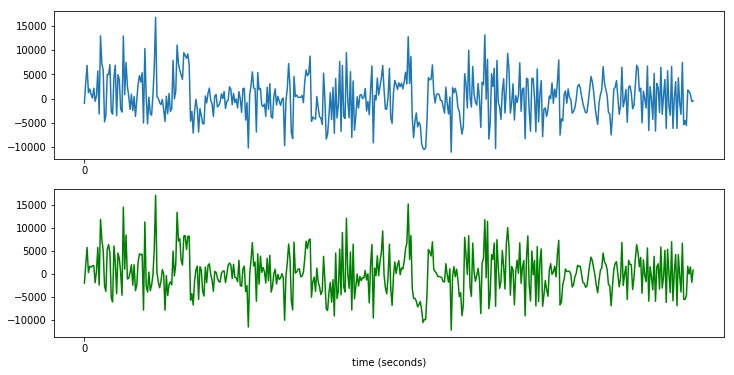

In [11]:
plotFile(clean)

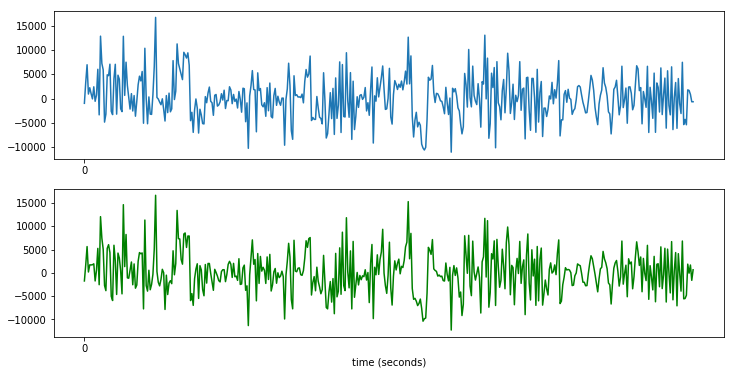

In [12]:
plotFile(distorted)

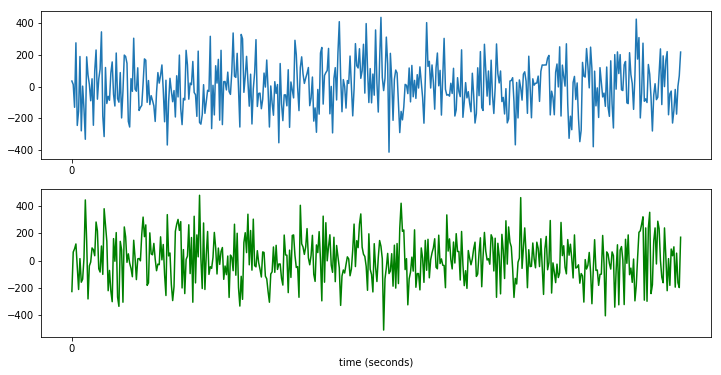

In [13]:
plotFile(noise)

In [24]:
crossCorrelation(c,c)

[83.45312045 79.96396264 75.09134412 ... 75.09134412 79.96396264
 83.45312045]
[62.92122782 62.01505695 59.95328294 ... 59.95328294 62.01505695
 62.92122782]


0.0

array([[ 66.98509879, 146.37434827],
       [ 64.29332457, 141.97901959],
       [ 60.90016372, 135.04462706],
       ...,
       [ 68.6002709 , 135.04462706],
       [ 72.20123286, 141.97901959],
       [ 74.27870402, 146.37434827]])

array([8018.97654899])

0.0


In [28]:
#c
#d
#r
#n
#resid
